In [29]:
words = open('names.txt', 'r').read().splitlines()

In [30]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [31]:
len(words)

32033

In [32]:
min(len(w) for w in words)

2

In [33]:
max(len(w) for w in words)

15

In [34]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

sorted(): It is a Python built-in function used to sort iterable objects.
    
b.items(): It returns a list of key-value pairs from dictionary b.
    
key=lambda kv: -kv[1]: It specifies the key to be used for sorting. Here, a lambda function is defined to extract the second element (kv[1]) from each key-value pair. The negative sign (-) is used to sort the values in descending order

In [35]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [36]:
import torch

In [37]:
#prepare the data structure to store the occurence of each bi-gram; 26 letters with <'S'> and <'E'>
N = torch.zeros((27, 27), dtype=torch.int32)

In [38]:
chars = sorted(list(set(''.join(words)))) #to concatenate every word and find all the characters in the strings
print(chars)
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
print(stoi)
itos = {i:s for s,i in stoi.items()}
print(itos)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [39]:
# zip function would enumerate all possible bigrams in a word 
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

The plt.text() function in Python’s Matplotlib library is used to add text to the current plot at the specified coordinates (i, j). Let’s break down the parameters and the provided string:
    
j, i: These are the coordinates where you want to place the text. In Matplotlib, the coordinates are typically specified as (x, y), with x running from left to right and y from bottom to top. So j would be the x-coordinate and i the y-coordinate.
    
chstr: This is the string containing the text you want to add to the plot.
    
ha="center": The ha parameter stands for “horizontal alignment.” By setting it to “center,” you’re aligning the text horizontally such that it is centered on the specified coordinates.
    
va="bottom": The va parameter stands for “vertical alignment.” Setting it to “bottom” means you want the text to be aligned with the bottom of the specified coordinates.
    
color='gray': This sets the color of the text to gray. You can specify any valid color string that Matplotlib understands.

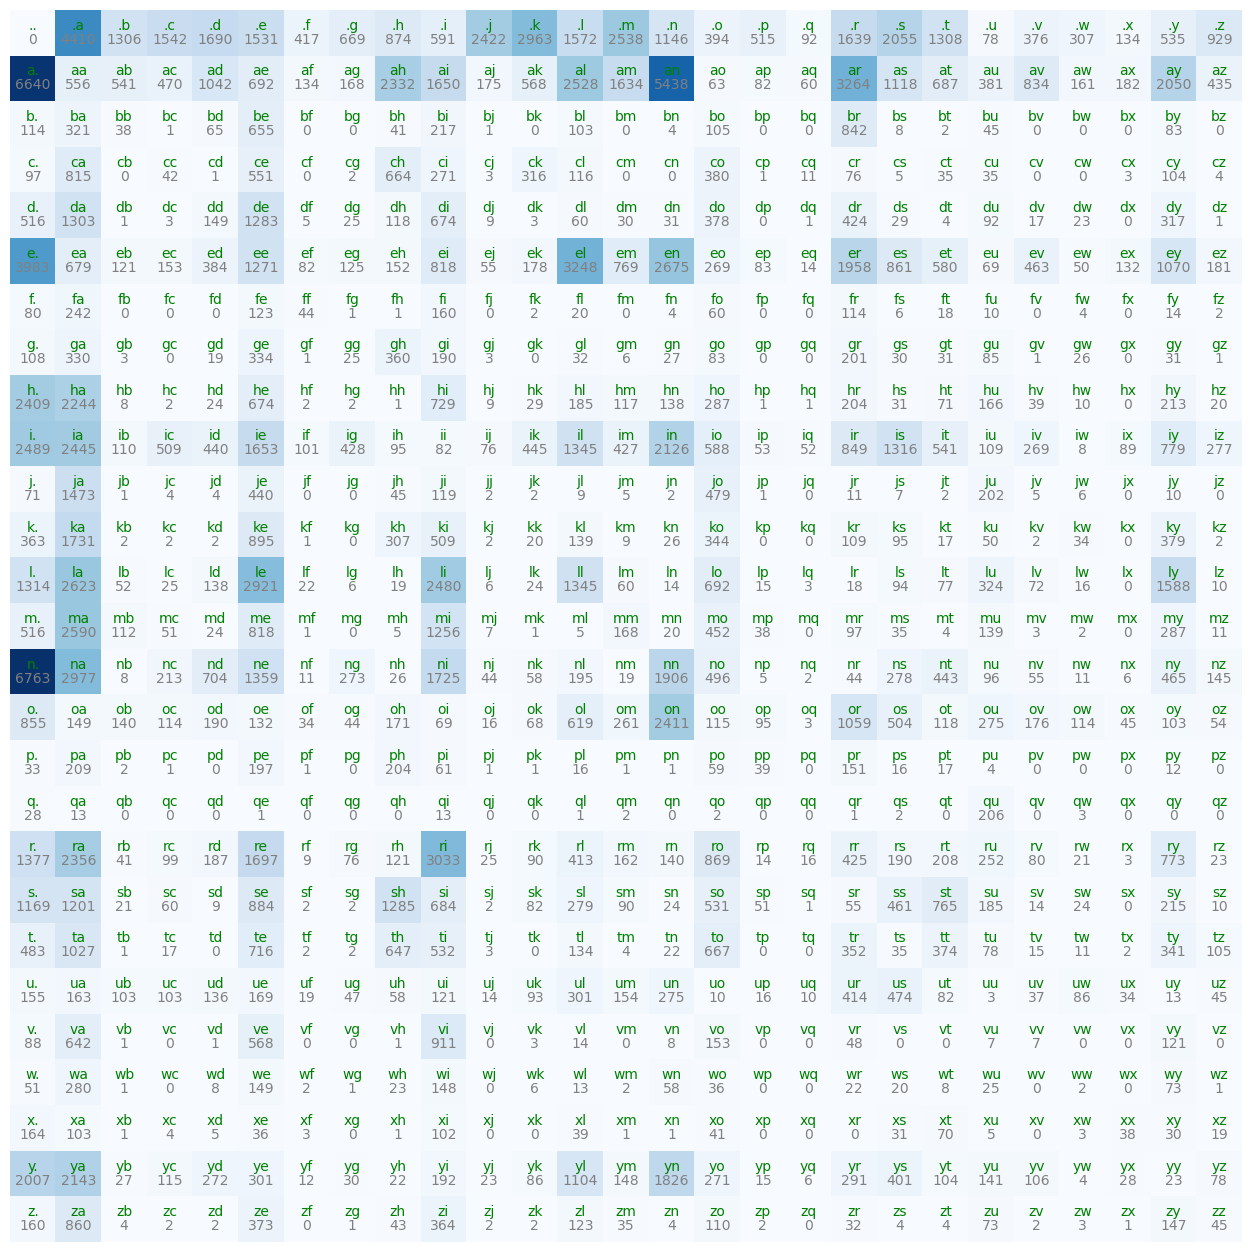

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='green')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [41]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [42]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

torch.Generator(): It creates a new instance of the Generator class in PyTorch, which is used for generating random numbers.
    
.manual_seed(2147483647): It sets the seed value of the generator to 2147483647. A seed is a starting point for generating random numbers, and setting a specific seed ensures that the sequence of random numbers generated is reproducible.
    
multinomial line of code is sampling from a multinomial distribution with probabilities p, drawing one sample with replacement, using the random number generator g to ensure reproducibility, and storing the resulting index (or class, depending on the context) in the variable ix. The .item() is used to get the actual integer value of the sampled index. 

The purpose is to generate a random letter based on the distribution of p, that is, to generate the first letter

In [98]:
g = torch.Generator().manual_seed(2147483647)

ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(ix)
itos[ix]

0


'.'

In [76]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(5, generator=g)
print(p)
p = p / p.sum()
p

tensor([0.7081, 0.3542, 0.1054, 0.5996, 0.0904])


tensor([0.3811, 0.1907, 0.0567, 0.3228, 0.0487])

In [95]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([3, 1, 0, 0, 3, 3, 3, 1, 3, 0, 3, 3, 2, 0, 0, 3, 3, 3, 3, 1, 0, 1, 2, 1,
        3, 3, 1, 0, 0, 0, 1, 3, 0, 0, 3, 2, 0, 1, 3, 1, 3, 3, 4, 2, 3, 3, 4, 1,
        1, 3, 2, 2, 0, 3, 4, 0, 0, 2, 0, 0, 2, 4, 0, 1, 3, 0, 3, 0, 3, 0, 4, 1,
        3, 1, 0, 0, 0, 3, 3, 1, 3, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 4, 3, 3,
        4, 0, 1, 0])

In [94]:
p.shape

torch.Size([5])

In [47]:
P = N.float()
P.shape
print(P[0])

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])


The keepdim=True argument is used to maintain the shape of the array with one dimension instead of reducing it to a single value. This is useful when you want to perform further operations that require the array to have a certain shape.Before this operation, if P has the shape (m, n), where m is the number of rows and n is the number of columns, the result will have the shape (m, 1). This means that for each row, you get a 1x1 array containing the sum of the elements in that row.

In [48]:
print(P[0])
P.sum(1, keepdim=True).shape
print(P[0][0])

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])
tensor(0.)


In [49]:
# 27, 27
# 27,  1

In [50]:
P.sum(1).shape


torch.Size([27])

In [51]:
# 27, 27
#  1, 27

In [52]:
P = (N+1).float()
print(P.sum(1, keepdims=True)[0])
P /= P.sum(1, keepdims=True)

print(P.shape)
print(P[0])

tensor([32060.])
torch.Size([27, 27])
tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])


to generate 5 words; ix=0, to choose the first letter of the word; then given the first one, it continues to generate following letter

In [72]:
g = torch.Generator().manual_seed(2147483647)


for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [54]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)
#

The log-likelihood of a statistical model is the natural logarithm of the likelihood function. The likelihood function is a measure of how likely the observed data is under a particular model. The likelihood function itself is the probability of the data given the model parameters.

In [55]:
log_likelihood = 0.0
n = 0

#print(words) all words in corpus, to compute the log_likelihood of all bigrams
for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1  #number of bigrams
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')   #f-string, to embed expressions inside string literals using curly braces {}
nll = -log_likelihood
print(f'{nll=}')
print(n)
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
228146
2.4543561935424805


In [56]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)


. e
e m
m m
m a
a .


In [57]:
xs

tensor([ 0,  5, 13, 13,  1])

In [59]:
ys

tensor([ 5, 13, 13,  1,  0])

In [58]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [61]:
xenc.shape

torch.Size([5, 27])

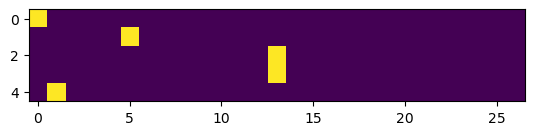

In [59]:
plt.imshow(xenc)

In [60]:
xenc.dtype

torch.float32

In [61]:
W = torch.randn((27, 1))
xenc @ W

tensor([[0.6375],
        [2.0986],
        [1.2992],
        [1.2992],
        [0.2409]])

In [62]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [63]:
probs[0]

tensor([1.])

In [64]:
probs[0].shape

torch.Size([1])

In [65]:
probs[0].sum()

tensor(1.)

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [66]:
xs

tensor([ 0,  5, 13, 13,  1])

In [70]:
ys

tensor([ 5, 13, 13,  1,  0])

In [67]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [68]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [69]:
probs.shape

torch.Size([5, 27])

In [70]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [561]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [75]:
xs

tensor([ 0,  5, 13, 13,  1])

In [76]:
ys

tensor([ 5, 13, 13,  1,  0])

In [77]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [78]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [79]:
print(loss.item())

3.7693049907684326


In [80]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [81]:
W.data += -0.1 * W.grad

In [606]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [82]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [716]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.481828451156616


In [83]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

ouwjdjdjawccadjufhqyywednw.
.
oiinwtoziaszwtwt.
ydaxjiauydbbleviajsdbduinrwipblvszwygnbyt.
otblufrmumkhyfodtumjmpgniszwjqrzafqyhogdaygezocckkpjabwtwtdkmriibwyfinwtgcasnhsvfbmofbuxhddgogfbptpasilu.
